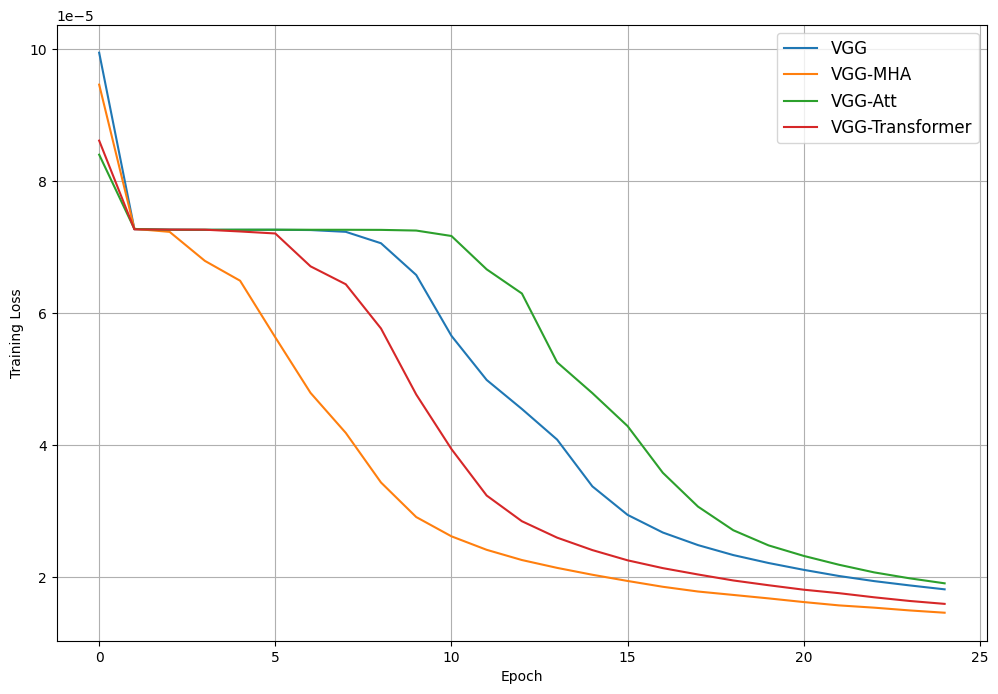

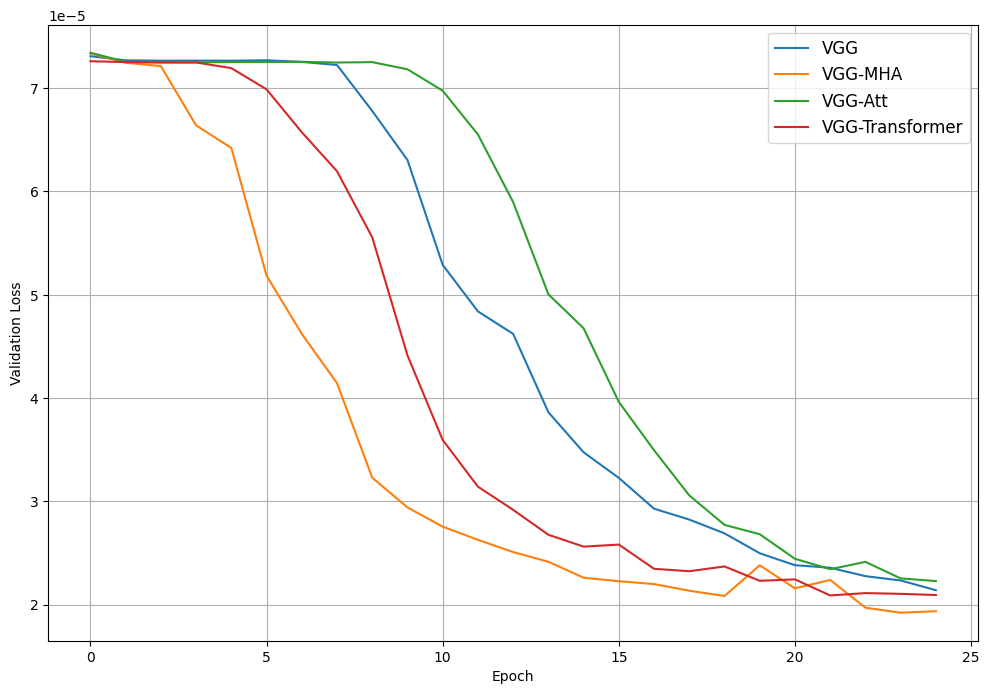

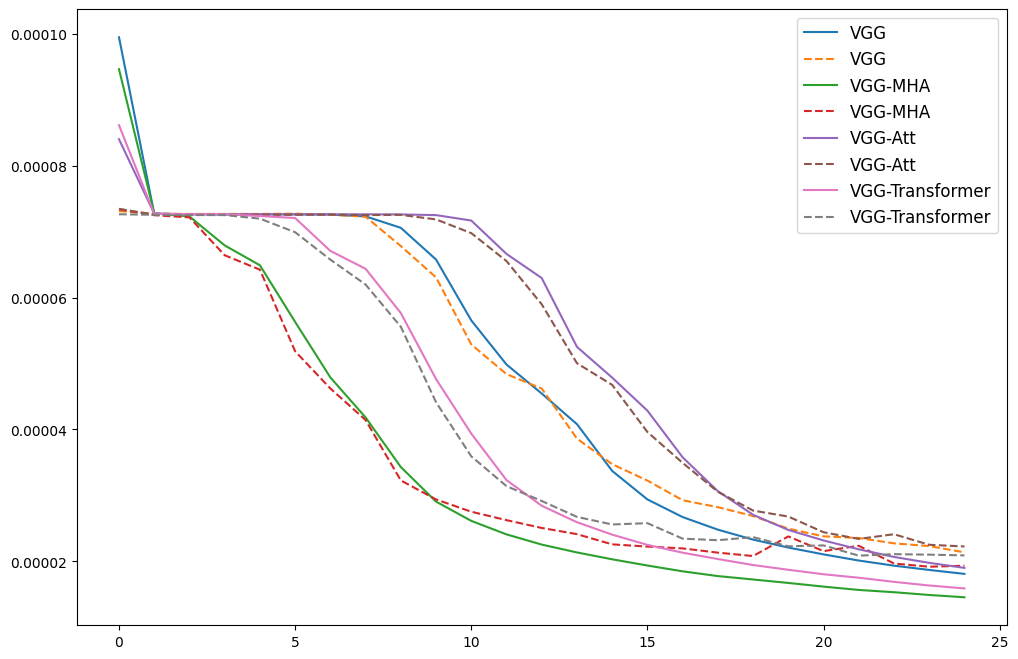

Training Loss Mean: 1.591544514529044e-05
Validation Loss Mean: 2.0923067109613452e-05


In [1]:
import yaml
import os 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def read_yaml(path):
    with open(path) as stream:
        try:
            data = yaml.safe_load(stream)
            # print(data)
        except yaml.YAMLError as exc:
            print(exc)
    return data
# Navigate through the data to get the required values
training_loss_mean = None
validation_loss_mean = None


def extract_loss_values(data):
    for item in data:
        if isinstance(item, tuple) and item[0] == 'training':
            training_data = item[1]
            for sub_item in training_data:
                if isinstance(sub_item, tuple) and sub_item[0] == 'results':
                    results_data = sub_item[1]
                    for result_item in results_data:
                        if isinstance(result_item, tuple) and result_item[0] == 'training_loss':
                            training_loss = result_item[1][0][1]
                        elif isinstance(result_item, tuple) and result_item[0] == 'validation_loss':
                            validation_loss = result_item[1][0][1]
                    return training_loss, validation_loss
    return None, None


model_list = ["model_logs/model_vgg_f_0603", "model_logs/model_vgg_f_mha_0605", "model_logs/model_vgg_f_attlast_0607", "model_logs/model_vgg_f_transformer_0605"] 
model_name_list = ["VGG", "VGG-MHA", "VGG-Att", "VGG-Transformer"]  
# model_path = "model_vgg_f_0603/"
fig1 = plt.figure(figsize=(12, 8))
ax1 = plt.axes()

fig2 = plt.figure(figsize=(12, 8))
ax2 = plt.axes()

fig3 = plt.figure(figsize=(12, 8))
ax3 = plt.axes()
for num, model_path in enumerate(model_list):
    train_loss, val_loss  = [], []
    for i in range(1,26):
        yaml_file = os.path.join(model_path, f'epoch_{i}.yaml')
        # print(f"Reading file: {yaml_file}")
        data = read_yaml(yaml_file)
        # Extract the training and validation loss values
        training_loss, validation_loss = extract_loss_values(data)
        train_loss.append(training_loss)
        val_loss.append(validation_loss)


    # Plot the training and validation loss values
    ax1.plot(train_loss, label=f"{model_name_list[num]}")
    ax2.plot(val_loss, label=f"{model_name_list[num]}")
    ax3.plot(train_loss, label=f"{model_name_list[num]}")
    ax3.plot(val_loss, "--", label=f"{model_name_list[num]}")



ax1.ticklabel_format(axis='y', style='sci', scilimits=(-5,-5))
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Training Loss")
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Validation Loss")
# ax1.set_ylim(0, 1e-5)
# ax1.set_xlim(0, 25)
# ax2.set_ylim(0, 11e-5)
# ax2.set_xlim(0, 25)
ax1.legend(loc="upper right", frameon=True, fancybox=True, framealpha=0.8, fontsize=12)
ax2.legend(loc="upper right", frameon=True, fancybox=True, framealpha=0.8, fontsize=12)
ax3.legend(loc="upper right", frameon=True, fancybox=True, framealpha=0.8, fontsize=12)
ax1.grid()
ax2.grid()
fig1.savefig("trainging_loss_plot.png")
fig2.savefig("validation_loss_plot.png")
plt.show()
# Print the results
print(f"Training Loss Mean: {training_loss}")
print(f"Validation Loss Mean: {validation_loss}")
